## Import Modules Before Starting

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Step 1: Load Data and Preprocessing

In [2]:
!gdown --id 14Z574W0bpEoKQMOnmNNRhhN0Qg6V0_nX


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14Z574W0bpEoKQMOnmNNRhhN0Qg6V0_nX
To: /content/Facebook _Supreme Court_Cases.csv
100% 276k/276k [00:00<00:00, 54.9MB/s]


In [3]:
File_Name="/content/Facebook _Supreme Court_Cases.csv"

In [4]:
def CSV_Data_Reader(File_Name, Seprator, NonNumerical):
  '''
  This function takes a csv file and generate a dictionary
  The keys of the dictionary are the column names
  Values of the dictionary are columns of the data
  '''
  with open(File_Name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=Seprator)
    line_count=0
    Data=[]
    for row in csv_reader:
      if line_count==0:
        Header=row
      else:
        Data.append(row)
      line_count=line_count+1

  Data_dict={}

  idx=0
  for name in Header:
    Data_dict[name]=[]
    for row in Data:
      if name in NonNumerical:
        Data_dict[name].append(row[idx])
      else:
        if row[idx].replace('.','').isdigit():
          Data_dict[name].append(float(row[idx]))
        else:
          Data_dict[name].append(None)
    idx=idx+1
  return Data_dict

In [5]:
Seperator=','
NonNumerical=['Case name','Alt name','source URL','summary','summary / issue','category','date (m)','Meta...','The Board...','principle','outcome','note','full abstract ','FB category','click-through link','date']

In [6]:
#calling on the csv data reader function to read file we have put in file name variable
#data will be held in data parsed variable
Data_Parsed=CSV_Data_Reader(File_Name, Seperator, NonNumerical)

In [7]:
#look at keys in data parsed dict to ensure everything got read in
print(Data_Parsed.keys())

dict_keys(['Case name', 'Alt name', 'source URL', 'summary', 'summary / issue', 'category', 'date (m)', 'year', 'month as number', 'Meta...', 'The Board...', 'principle', 'outcome', 'note', 'no of user complaints (if listed)', 'full abstract ', 'FB category', 'Controversy (relates to no. of google news stories)', 'click-through link', 'ID', 'date'])


### Create new dict that will hold the columns we will need (controversy and month as number)

In [8]:
#needed data dict will hold columns we need
#include no of user complaints just for raw plots
Needed_Data={}

for i in Data_Parsed:
  if i in ['Controversy (relates to no. of google news stories)','date','no of user complaints (if listed)']:
    Needed_Data[i]=Data_Parsed[i]

In [9]:
#check new dict keys to ensure right columns transferred
print(Needed_Data.keys())

dict_keys(['no of user complaints (if listed)', 'Controversy (relates to no. of google news stories)', 'date'])

### Extract Month from Date Column

In [10]:
## all values in date field as populated
## have to handle September abbrev differently since it is not compatible with datetime module
## have to convert into Sep bc Sept will not be recog by dt library


#in addition need two different cases when using strptime function since some months are written out some are abbrev
Needed_Data['month']=[]

for date_str in Needed_Data['date']:
  date_str=date_str.strip()
  date_obj=None
  try:
    date_obj = datetime.datetime.strptime(date_str, '%B %Y')
  except ValueError:
    try:
      date_obj = datetime.datetime.strptime(date_str, '%b %Y')
    except ValueError:
      if date_str.startswith('Sept'):
        date_obj = datetime.datetime.strptime(date_str.replace('Sept','Sep'), '%b %Y')

  if date_obj is not None:
    Needed_Data['month'].append(date_obj.month)
  else:
    Needed_Data['month'].append(None)


print(Needed_Data)



{'no of user complaints (if listed)': [None, None, None, 0.0, 0.0, 7.0, 11.0, 6.0, 9666.0, 30.0, 23.0, 5.0, None, 35.0, 11.0, 6.0, None, None, None, 2.0, None, None, None, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, None, 1.0, 11.0, None, None, None, 1.0, 3.0, 1.0, None, 3.0, None, None, None, 11.0, 130.0, 4.0, 6.0, 8.0, 10.0, 9.0, 162.0, 397.0, 23.0, 12.0, 10.0, 26.0, 18.0, 8.0, 7.0, 16.0, 8.0, 3.0, 11.0, 24.0, 12.0, 8.0, 2.0, 6.0, 23.0, None, None], 'Controversy (relates to no. of google news stories)': [250.0, 100.0, 75.0, 150.0, 75.0, 100.0, 50.0, 50.0, 450.0, 50.0, 75.0, 50.0, 200.0, 100.0, 50.0, 125.0, 50.0, 50.0, 50.0, 100.0, 50.0, 50.0, 50.0, 100.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 50.0, 50.0, 100.0, 100.0, 75.0, 125.0, 100.0, 50.0, 200.0, 250.0, 50.0, 250.0, 75.0, 75.0, 350.0, 50.0, 50.0, 75.0, 100.0, 250.0, 75.0, 50.0, 100.0, 200.0, 100.0, 200.0, 50.0, 50.0, 75.0, 50.0, 75.0, 75.0, 50.0, 75.0, 50.0, 50.0, 50.0, 75.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100

### Filter out null values in both needed columns for more accurate analysis

In [11]:
#iterate through each needed column and check if value is null
#not necessary to remove nulls for user complaints as it does not substantially affect raw plot
#USER COMPLAINT NOT NEEDED IN STATISTICAL ANALYSIS
valid_data=[
    i for i in range(len(Needed_Data['Controversy (relates to no. of google news stories)']))
    if Needed_Data['Controversy (relates to no. of google news stories)'][i] not in [None, '']
    and Needed_Data['month'][i] not in [None, '']
]

#create new dictionary of needed columns where we are filtering out null values from previous statement
not_null_data= {
    key: [value[i] for i in valid_data] for key,value in Needed_Data.items()
}

In [12]:
#check to ensure there is no null or blank values
#fine with nulls in user complaints
for key,value in not_null_data.items():
  print(f"{key}: {value}")

no of user complaints (if listed): [None, None, None, 0.0, 0.0, 7.0, 11.0, 6.0, 9666.0, 30.0, 23.0, 5.0, None, 35.0, 11.0, 6.0, None, None, None, 2.0, None, None, None, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, None, 1.0, 11.0, None, None, None, 1.0, 3.0, 1.0, None, 3.0, None, None, None, 11.0, 130.0, 4.0, 6.0, 8.0, 10.0, 9.0, 162.0, 397.0, 23.0, 12.0, 10.0, 26.0, 18.0, 8.0, 7.0, 16.0, 8.0, 3.0, 11.0, 24.0, 12.0, 8.0, 2.0, 6.0, 23.0, None, None]
Controversy (relates to no. of google news stories): [250.0, 100.0, 75.0, 150.0, 75.0, 100.0, 50.0, 50.0, 450.0, 50.0, 75.0, 50.0, 200.0, 100.0, 50.0, 125.0, 50.0, 50.0, 50.0, 100.0, 50.0, 50.0, 50.0, 100.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 50.0, 50.0, 100.0, 100.0, 75.0, 125.0, 100.0, 50.0, 200.0, 250.0, 50.0, 250.0, 75.0, 75.0, 350.0, 50.0, 50.0, 75.0, 100.0, 250.0, 75.0, 50.0, 100.0, 200.0, 100.0, 200.0, 50.0, 50.0, 75.0, 50.0, 75.0, 75.0, 50.0, 75.0, 50.0, 50.0, 50.0, 75.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 10

## Step 2 - Raw Plots

### Line Plot

In [39]:
#index not null data and create two separate variables
dates = not_null_data['month']
controversy = not_null_data['Controversy (relates to no. of google news stories)']

##zipping lists together
#month becomes key in new dictionary and sum of controversies for each month becomes value for each key
monthly_controversy ={}
for month, cont in zip(dates,controversy):
  if month in monthly_controversy:
    monthly_controversy[month] += cont
  else:
    monthly_controversy[month] = cont

#sorting so the months will be in order when plotting
sorted_months = sorted(monthly_controversy.keys())
summed_controversy = [monthly_controversy[month] for month in sorted_months]

#making new dictionary with zipped list where sorted month is key and then summed controversies are values
monthly_controversy_dict = {month: controversy for month, controversy in zip(sorted_months, summed_controversy)}

# Print the dictionary for verification
print("Monthly Controversy Dictionary:", monthly_controversy_dict)



Monthly Controversy Dictionary: {1: 1675.0, 2: 450.0, 3: 175.0, 4: 150.0, 5: 150.0, 6: 575.0, 7: 425.0, 8: 425.0, 9: 825.0, 10: 700.0, 11: 625.0, 12: 1250.0}


Text(0.5, 1.0, 'Controversial Stories Regarding FB Posts over Time')

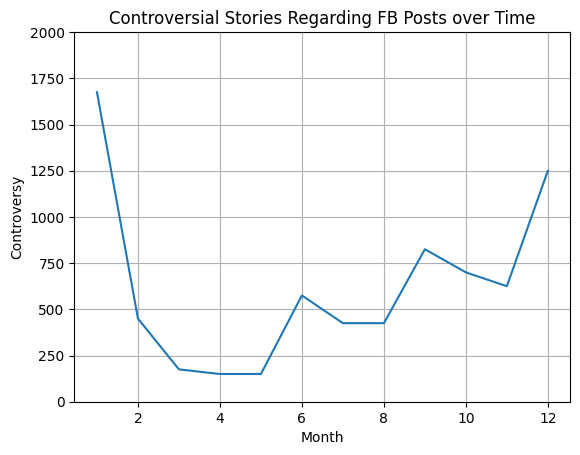

In [40]:
#matplotlib line plot showing controversy over different months
plt.plot(monthly_controversy_dict.keys(), monthly_controversy_dict.values())
plt.grid()
plt.ylim([0,2000])
plt.xlabel('Month')
plt.ylabel('Controversy')

plt.title('Controversial Stories Regarding FB Posts over Time')

###  Scatter Plot

Text(0.5, 1.0, 'User Complaints versus Controversial News Stories')

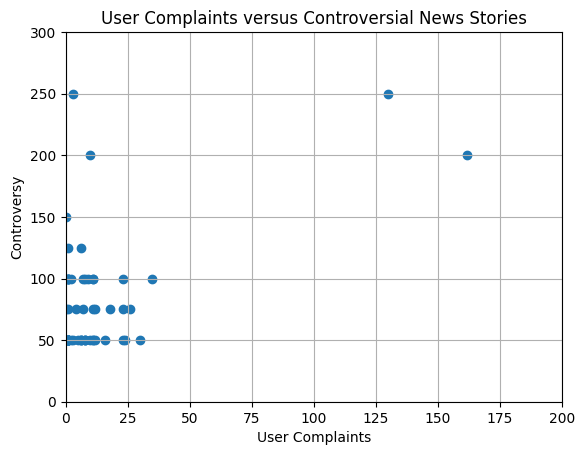

In [41]:
#scatter plot using matplotlib to show number of user complaints related to controversy
#no of user complaints - nulls in this column will not affect graph substantially in the scope of this analysis
plt.scatter(not_null_data['no of user complaints (if listed)'],not_null_data['Controversy (relates to no. of google news stories)'])
plt.grid()
plt.xlim([0,200])
plt.ylim([0,300])
plt.xlabel('User Complaints')
plt.ylabel('Controversy')
plt.title('User Complaints versus Controversial News Stories')

### Histogram

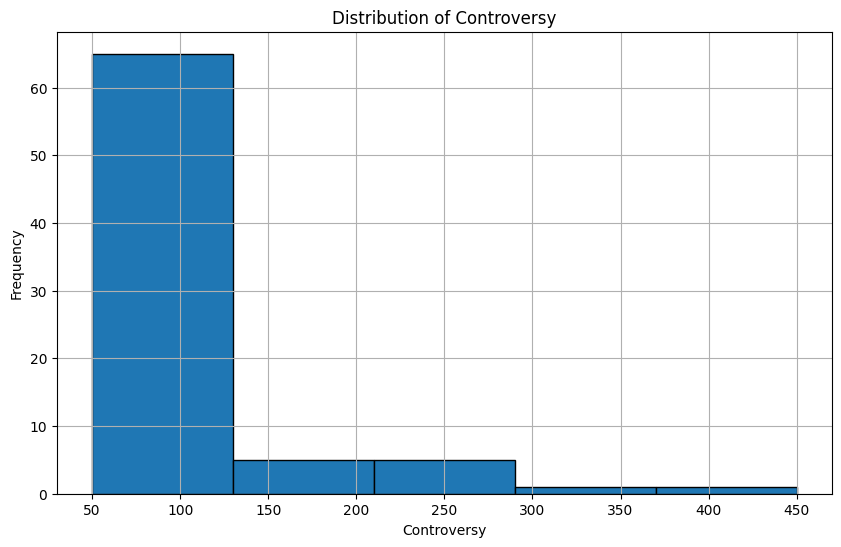

In [42]:
#plotting histogram using numpy using frequency of # of controversies

plt.figure(figsize=(10,6))
plt.hist(not_null_data['Controversy (relates to no. of google news stories)'], bins=5, edgecolor='black')
plt.xlabel('Controversy')
plt.ylabel('Frequency')
plt.title('Distribution of Controversy')
plt.grid()
plt.show()


## Step 3 - Compute Statistics

In [19]:
#grouped data variable is a dictionary that holds controversy for that month and record count of controversies for that month
#ranging from 1 to 13 so code will go from 1 to 12 which represents each month
#initialize record count to 0
grouped_data= {month: {'Controversy': [], 'Record Count': 0} for month in range(1,13)}

#group data by month
#iterate through length of month column in not null data and that becomes iterator used to append to group data variable
for i in range(len(not_null_data['month'])):
  month=not_null_data['month'][i]
  grouped_data[month]['Controversy'].append(not_null_data['Controversy (relates to no. of google news stories)'][i])
  grouped_data[month]['Record Count'] += 1


#print results to see controversy data points for each month
print(grouped_data)


{1: {'Controversy': [450.0, 50.0, 125.0, 350.0, 250.0, 75.0, 50.0, 200.0, 50.0, 75.0], 'Record Count': 10}, 2: {'Controversy': [250.0, 100.0, 100.0], 'Record Count': 3}, 3: {'Controversy': [75.0, 50.0, 50.0], 'Record Count': 3}, 4: {'Controversy': [100.0, 50.0], 'Record Count': 2}, 5: {'Controversy': [75.0, 75.0], 'Record Count': 2}, 6: {'Controversy': [150.0, 50.0, 50.0, 75.0, 100.0, 100.0, 50.0], 'Record Count': 7}, 7: {'Controversy': [75.0, 75.0, 200.0, 75.0], 'Record Count': 4}, 8: {'Controversy': [50.0, 250.0, 75.0, 50.0], 'Record Count': 4}, 9: {'Controversy': [50.0, 125.0, 100.0, 50.0, 200.0, 250.0, 50.0], 'Record Count': 7}, 10: {'Controversy': [100.0, 75.0, 75.0, 50.0, 50.0, 50.0, 50.0, 250.0], 'Record Count': 8}, 11: {'Controversy': [75.0, 100.0, 50.0, 50.0, 50.0, 100.0, 50.0, 50.0, 50.0, 50.0], 'Record Count': 10}, 12: {'Controversy': [50.0, 200.0, 50.0, 100.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 50.0, 50.0, 100.0, 100.0, 50.0, 100.0], 'Record Count': 17}}


### Calculate Stats

In [43]:
#create empty dictionaries for all stats we will calculate
avg_controversy={}
max_controversy={}
record_count={}

#writing for loop to go through grouped data to calculate avg and max
#already calculated record count in previous statement so just adding to dictionary inside of loop for each month
for month, data in grouped_data.items():
  controversy_lst = data['Controversy']
  avg_controversy[month] = round(sum(controversy_lst) / len(controversy_lst),2)
  max_controversy[month] = max(controversy_lst)

  record_count[month]=data['Record Count']

print("Average Controversy per Month:")
print(avg_controversy)
print("\nMaximum Controversy per Month:")
print(max_controversy)
print("\nNumber of Records per Month:")
print(record_count)

Average Controversy per Month:
{1: 167.5, 2: 150.0, 3: 58.33, 4: 75.0, 5: 75.0, 6: 82.14, 7: 106.25, 8: 106.25, 9: 117.86, 10: 87.5, 11: 62.5, 12: 73.53}

Maximum Controversy per Month:
{1: 450.0, 2: 250.0, 3: 75.0, 4: 100.0, 5: 75.0, 6: 150.0, 7: 200.0, 8: 250.0, 9: 250.0, 10: 250.0, 11: 100.0, 12: 200.0}

Number of Records per Month:
{1: 10, 2: 3, 3: 3, 4: 2, 5: 2, 6: 7, 7: 4, 8: 4, 9: 7, 10: 8, 11: 10, 12: 17}


## Step 4 - Summary Plots

### Line Chart of Avg. Controversy

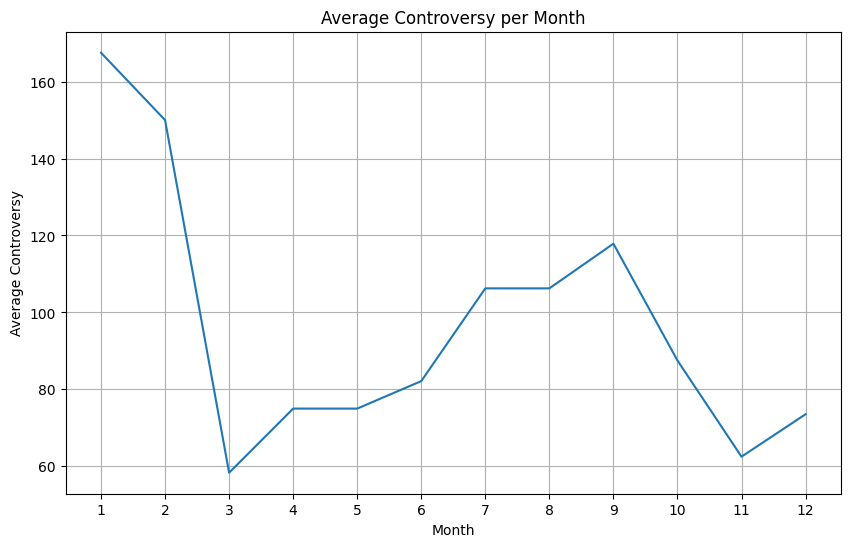

In [44]:
##converting to list for easy plotting
months=list(avg_controversy.keys())
avg_values=list(avg_controversy.values())

#plotting average controversy for each month
plt.figure(figsize=(10,6))
plt.plot(months,avg_values)
plt.xlabel('Month')
plt.ylabel('Average Controversy')
plt.title('Average Controversy per Month')
plt.xticks(months)

plt.grid()
plt.show()

### Bar Chart of Maximum Controversies per Month

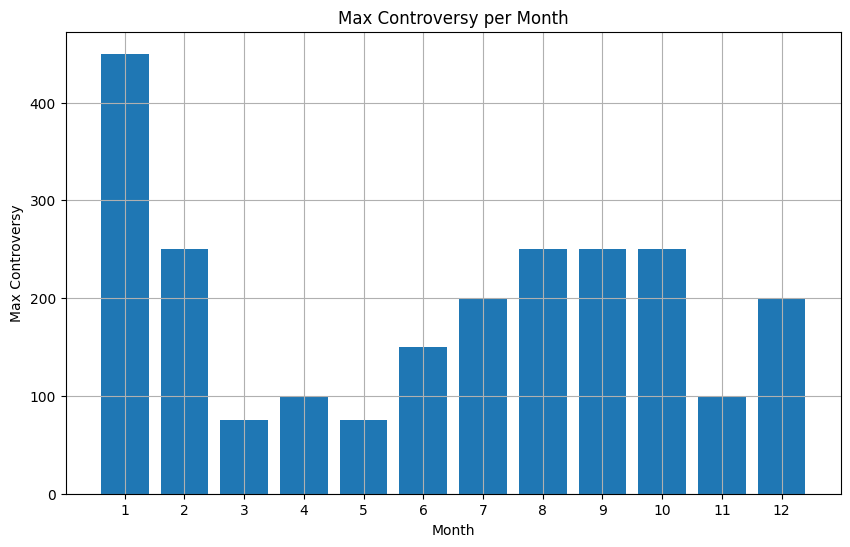

In [22]:
#same thing - convert to list for easy plotting
months=list(max_controversy.keys())
max_values=list(max_controversy.values())

#bar chart to show max number of controversies for each month
plt.figure(figsize=(10,6))
plt.bar(months,max_values)
plt.xlabel('Month')
plt.ylabel('Max Controversy')
plt.title('Max Controversy per Month')
plt.xticks(months)

plt.grid()
plt.show()

### Plot Record Count per Month

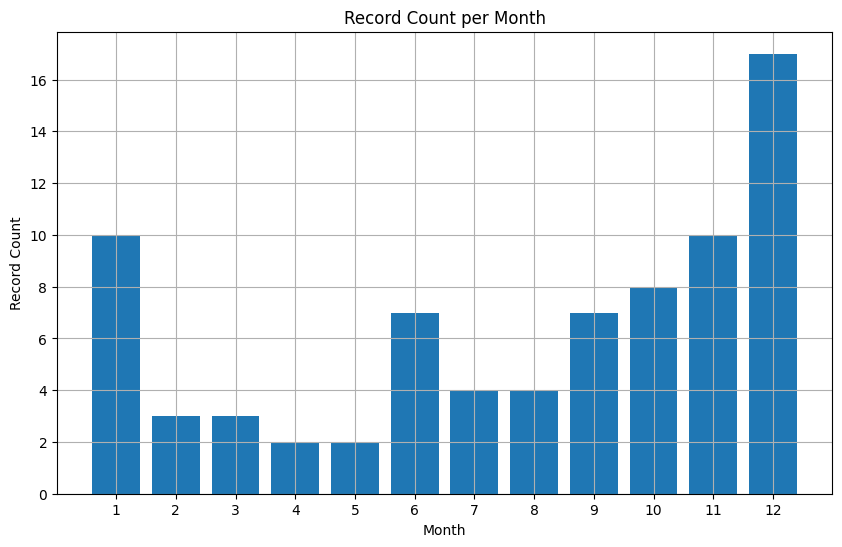

In [45]:
#list conversion for easy plotting
months=list(record_count.keys())
records=list(record_count.values())

#bar chart to easily show record count for each month
plt.figure(figsize=(10,6))
plt.bar(months,records)
plt.xlabel('Month')
plt.ylabel('Record Count')
plt.title('Record Count per Month')
plt.xticks(months)

plt.grid()
plt.show()

## Step 5 - Verify Stats

In [46]:
#read in csv file with pandas read_csv
final_df=pd.read_csv(File_Name)


In [47]:
#create variable that holds relevant columns we used for previous analysis
final=pd.DataFrame(final_df)
relevant_df=final[['date','Controversy (relates to no. of google news stories)']].copy()


In [48]:
#print to see that correct columns are in new df we will use to check stats
relevant_df

,date,Controversy (relates to no. of google news stories)
0,Feb 2024,250
1,Oct 2023,100
2,Nov 2023,75
3,June 2023,150
4,March 2022,75
...,...,...
72,Oct 2020,50
73,Nov 2020,50
74,Dec 2020,100
75,Feb 2022,100


In [53]:
#extracting date into datetime column
relevant_df['month'] = pd.to_datetime(relevant_df['date']).dt.month


<ipython-input-53-f547a9080f02>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  relevant_df['month'] = pd.to_datetime(relevant_df['date']).dt.month


In [54]:
relevant_df

,date,Controversy (relates to no. of google news stories),month
0,Feb 2024,250,2
1,Oct 2023,100,10
2,Nov 2023,75,11
3,June 2023,150,6
4,March 2022,75,3
...,...,...,...
72,Oct 2020,50,10
73,Nov 2020,50,11
74,Dec 2020,100,12
75,Feb 2022,100,2


In [56]:
## groupby function to group controversies by month so that we can perform analysis
grouped=relevant_df.groupby('month')['Controversy (relates to no. of google news stories)']


### Directly Compare Numpy and Pandas Stats

In [60]:
#calculate stats with pd from grouped data
avg_controversypd=round(grouped.mean(),2)
max_controversypd=round(grouped.max(),2)
record_countpd=grouped.count()

#calculate stats with np from grouped data
#previously used lambda function in previous courses to iterate through grouped data and calculate stats
#round for better readability
avg_controversynp=round(grouped.apply(lambda x: np.mean(x)),2)
max_controversynp=round(grouped.apply(lambda x: np.max(x)),2)
record_countnp=grouped.apply(lambda x: np.size(x))

#make compare df to directly compare pandas and numpy stats
compare_df = pd.DataFrame({
    'Month': avg_controversypd.index,
    'Avg_Pandas': avg_controversypd.values,
    'Avg_Numpy' : avg_controversynp.values,
    'Max_Pandas': max_controversypd.values,
    'Max_Numpy': max_controversynp.values,
    'Record_Count_Pandas': record_countpd.values,
    'Record_Count_Numpy': record_countnp.values
    })

compare_df

,Month,Avg_Pandas,Avg_Numpy,Max_Pandas,Max_Numpy,Record_Count_Pandas,Record_Count_Numpy
0,1,167.50,167.50,450,450,10,10
1,2,150.00,150.00,250,250,3,3
2,3,58.33,58.33,75,75,3,3
3,4,75.00,75.00,100,100,2,2
4,5,75.00,75.00,75,75,2,2
5,6,82.14,82.14,150,150,7,7
6,7,106.25,106.25,200,200,4,4
7,8,106.25,106.25,250,250,4,4
8,9,117.86,117.86,250,250,7,7
9,10,87.50,87.50,250,250,8,8


### Plotting to Verify Manual Calculation

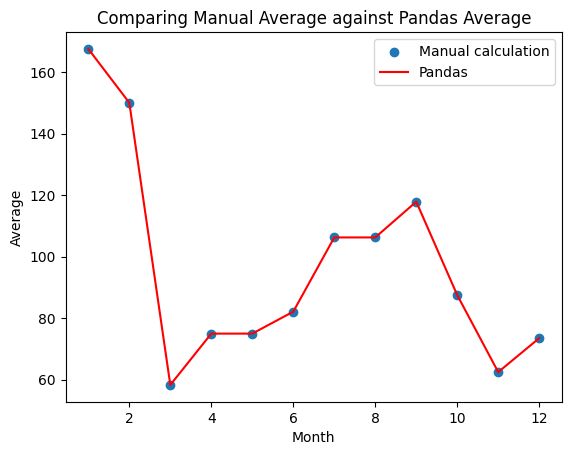

In [61]:
#create variable for months to use in plot for x axis
pandas_months=avg_controversypd.index

#plotting manual averages by scatter and pd averages by line plot
#dots should align with line graph
plt.scatter(months,avg_values)
plt.plot(pandas_months,avg_controversypd,c="red")
plt.title("Comparing Manual Average against Pandas Average")
plt.xlabel("Month")
plt.ylabel("Average")
plt.legend(["Manual calculation", "Pandas"])

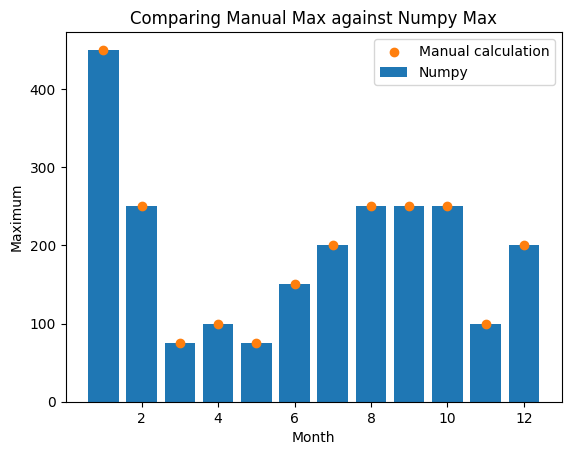

In [62]:
#create variable to hold max months index and use for x axis
np_monthsmax=max_controversynp.index

#we are plotting manual scatter on numpy bar chart
#we see that max values of each month match for both methods
plt.bar(np_monthsmax,max_controversynp)
plt.scatter(months,max_values)
plt.title("Comparing Manual Max against Numpy Max")
plt.xlabel("Month")
plt.ylabel("Maximum")
plt.legend(["Manual calculation", "Numpy"])

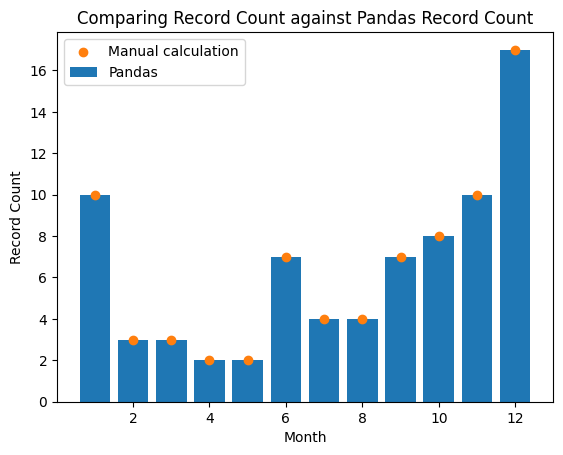

In [63]:
#create variable to hold record months index and use for x axis
pd_monthsrecord=record_countpd.index

#we are plotting manual scatter on pandas bar chart
#we see that record counts of each month match for both methods
plt.bar(pd_monthsrecord,record_countpd)
plt.scatter(months,records)
plt.title("Comparing Record Count against Pandas Record Count")
plt.xlabel("Month")
plt.ylabel("Record Count")
plt.legend(["Manual calculation", "Pandas"])